# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[7], verbose=True)

Training/Valid data shape: (238, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.38836
	Train loss: 0.04396, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02822, Accuracy: 19/48 (39.58%)
	Test loss: 0.02837, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.54224
	Train loss: 0.04384, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02774, Accuracy: 18/48 (37.50%)
	Test loss: 0.02847, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.39479
	Train loss: 0.04340, Accuracy: 49/190 (25.79%)
	Validation loss: 0.02758, Accuracy: 17/48 (35.42%)
	Test loss: 0.02813, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.41278
	Train loss: 0.04348, Accuracy: 46/190 (24.21%)
	Validation loss: 0.02775, Accuracy: 15/48 (31.25%)
	Test loss: 0.02863, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.39625
	Train loss: 0.04385, Accuracy: 53/190 (27.89%)
	Validation loss: 0.02820, Accuracy: 12/48 (25.00%)
	Test loss: 0.02903,

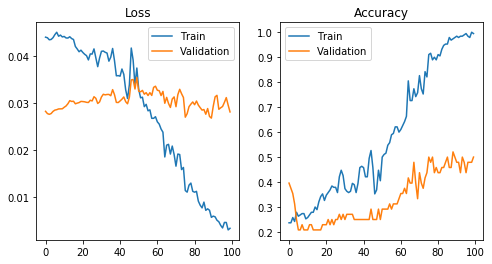

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.43627
	Train loss: 0.04387, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02938, Accuracy: 9/48 (18.75%)
	Test loss: 0.02736, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.39762
	Train loss: 0.04398, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02949, Accuracy: 9/48 (18.75%)
	Test loss: 0.02726, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.45879
	Train loss: 0.04383, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02945, Accuracy: 9/48 (18.75%)
	Test loss: 0.02733, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.42934
	Train loss: 0.04356, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02947, Accuracy: 9/48 (18.75%)
	Test loss: 0.02738, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.36482
	Train loss: 0.04289, Accuracy: 55/190 (28.95%)
	Validation loss: 0.02953, Accuracy: 10/48 (20.83%)
	Test loss: 0.02742, 

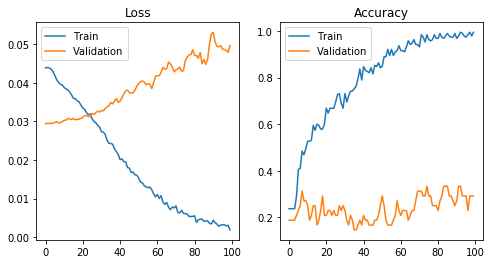

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.45232
	Train loss: 0.04424, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02838, Accuracy: 19/48 (39.58%)
	Test loss: 0.02817, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.45730
	Train loss: 0.04430, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02837, Accuracy: 17/48 (35.42%)
	Test loss: 0.02844, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.39748
	Train loss: 0.04372, Accuracy: 51/190 (26.84%)
	Validation loss: 0.02849, Accuracy: 17/48 (35.42%)
	Test loss: 0.02849, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.39155
	Train loss: 0.04311, Accuracy: 59/190 (31.05%)
	Validation loss: 0.02872, Accuracy: 17/48 (35.42%)
	Test loss: 0.02875, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.34600
	Train loss: 0.04271, Accuracy: 61/190 (32.11%)
	Validation loss: 0.02880, Accuracy: 15/48 (31.25%)
	Test loss: 0.02884, 

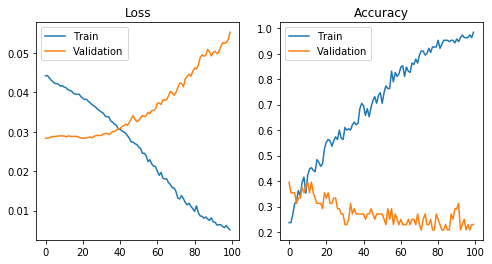

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.39156
	Train loss: 0.04394, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02879, Accuracy: 9/48 (18.75%)
	Test loss: 0.02767, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.38777
	Train loss: 0.04387, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02884, Accuracy: 9/48 (18.75%)
	Test loss: 0.02765, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.38530
	Train loss: 0.04382, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02889, Accuracy: 9/48 (18.75%)
	Test loss: 0.02765, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.38440
	Train loss: 0.04378, Accuracy: 45/190 (23.68%)
	Validation loss: 0.02894, Accuracy: 9/48 (18.75%)
	Test loss: 0.02766, Accuracy: 18/50 (36.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.38382
	Train loss: 0.04374, Accuracy: 60/190 (31.58%)
	Validation loss: 0.02897, Accuracy: 13/48 (27.08%)
	Test loss: 0.02767, 

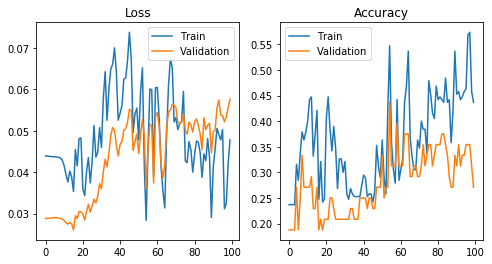

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.37609
	Train loss: 0.04387, Accuracy: 48/190 (25.26%)
	Validation loss: 0.02924, Accuracy: 11/48 (22.92%)
	Test loss: 0.02755, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.37556
	Train loss: 0.04377, Accuracy: 48/190 (25.26%)
	Validation loss: 0.02918, Accuracy: 11/48 (22.92%)
	Test loss: 0.02760, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.38707
	Train loss: 0.04362, Accuracy: 56/190 (29.47%)
	Validation loss: 0.02908, Accuracy: 12/48 (25.00%)
	Test loss: 0.02761, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.37113
	Train loss: 0.04342, Accuracy: 68/190 (35.79%)
	Validation loss: 0.02897, Accuracy: 11/48 (22.92%)
	Test loss: 0.02752, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.38237
	Train loss: 0.04308, Accuracy: 70/190 (36.84%)
	Validation loss: 0.02874, Accuracy: 12/48 (25.00%)
	Test loss: 0.027

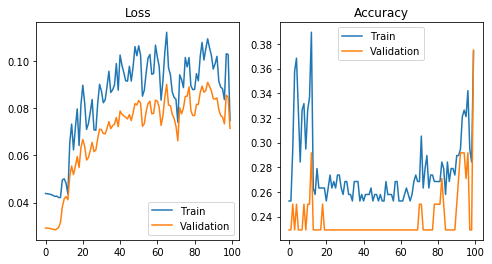

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)